In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#les erreurs sont traitées en % et ensuite converties (/100) pour travailler avec pg

In [20]:
filename = 'Mesures_Brutes/dipdipgps.txt'
filename1 = 'Mesures_Brutes/gradgps.txt'
filename2 = 'Mesures_Brutes/aa4impair.txt'
filename3 = 'Mesures_Brutes/aa8.txt'
filename4 = 'Mesures_Brutes/aa9.txt'
filename5 = 'Mesures_Brutes/aa13.txt'
filename6 = 'Mesures_Brutes/aa15.txt'
filename7 = 'Mesures_Brutes/aa4enterrees.txt'
filenamek = 'Mesures_Brutes/dipdipgpsk.txt'
filenamek_ent ='Mesures_Brutes/aa4impairk.txt'

In [21]:
def shift_cols(df):
    rename_dict={}
    cols=[i for i in df.columns]
    cols.append('bad')
    for i in range(len(cols[:-1])):
        rename_dict.update({cols[i]:cols[i+1]})
    df.rename(rename_dict, axis=1, inplace=True)
    df.drop('bad', axis=1, inplace=True)
    return df

In [22]:
def read_ert_data(filename):
    with open(filename, 'r') as f:
        n_elec = int(f.readline())
        for i in range(n_elec+1):
            f.readline()
        n_data = int(f.readline())
    df_elec = pd.read_csv(filename, sep="\t", skiprows=1, nrows=n_elec)
    df_elec = shift_cols(df_elec)
    df_data = pd.read_csv(filename, sep="\t", skiprows=3+n_elec, nrows=n_data+1)
    df_data = shift_cols(df_data)
    return df_elec, df_data

In [23]:
def write_ert_data(filename, df_elec, df_data):#, df_eleck, filenamek):
    df_data.reset_index(drop=True, inplace=True)
    n_elec = df_elec.shape[0]
    n_data=df_data.shape[0]
    with open(filename, 'w+') as f:
        f.write(str(n_elec)+'\n')
        f.write('#\tX\tZ\tY\n')
    df_elec.to_csv(filename, sep="\t", mode='a', header=False, index=False)
    with open(filename, 'a') as f:   
        f.write(f'{n_data}\n')
        f.write('#\t')
    df_data.to_csv(filename, sep='\t', mode='a', index=False)
    
    # with open(filenamek, 'w+') as f:
    #     f.write(str(n_elec)+'\n')
    #     f.write('#\tX\tY\tZ\n')
    # df_eleck.to_csv(filenamek, sep="\t", mode='a', header=False, index=False)
    # with open(filenamek, 'a') as f:   
    #     f.write(f'{n_data}\n')
    #     f.write('#\t')
    # df_data.to_csv(filenamek, sep='\t', mode='a', index=False)

In [24]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Nom de la séquence de mesures')
    #ax.set_ylim(-.5,10.5)

In [25]:
def set_axis_styley(ax, labels):
    ax.yaxis.set_tick_params(direction='out')
    ax.yaxis.set_ticks_position('left')
    ax.set_yticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_ylim(0.25, len(labels) + 0.75)
    ax.set_ylabel('Nom de la séquence de mesures')
    #ax.set_ylim(-.5,10.5)

In [26]:
df_elec, df_data = read_ert_data(filename)
df_elec1, df_data1 = read_ert_data(filename1)
df_elec2, df_data2 = read_ert_data(filename2)
df_elec3, df_data3 = read_ert_data(filename3)
df_elec4, df_data4 = read_ert_data(filename4)
df_elec5, df_data5 = read_ert_data(filename5)
df_elec6, df_data6 = read_ert_data(filename6)
df_elec7, df_data7 = read_ert_data(filename7)
df_eleck, df_dataxx = read_ert_data(filenamek)
df_eleck_ent, df_dataxxk = read_ert_data(filenamek_ent)

In [27]:
df_eleck

,X,Y,Z
0,623324.438,639427.798,86.22
1,623322.475,639428.300,86.20
2,623320.542,639428.788,86.18
3,623318.606,639429.271,86.18
4,623316.715,639429.747,86.19
...,...,...,...
77,623177.262,639474.714,86.20
78,623175.409,639475.491,86.21
79,623173.550,639476.251,86.24
80,623171.741,639477.069,86.23


In [28]:
labels = [f'Dip-Dip\n{len(df_data)} données', f'Schlumberger\n{len(df_data1)} données', f'AMnB\n{len(df_data2)} données', f'AnMb\n{len(df_data3)} données',
          f'AbMn\n{len(df_data4)} données', f'AmBn\n{len(df_data5)} données', f'aNmb\n{len(df_data6)} données', f'abmn\n{len(df_data7)} données']

In [29]:
#write_ert_data('test.csv', df_elec, df_filtered)

In [30]:
df_elec

,X,Y,Z
0,0,0,86.22
1,2,0,86.20
2,4,0,86.18
3,6,0,86.18
4,8,0,86.19
...,...,...,...
77,154,0,86.20
78,156,0,86.21
79,158,0,86.24
80,160,0,86.23


In [31]:
df_data1

,a,b,m,n,u,i,err
0,1,13,2,3,296.693,348.304,0.34
1,1,13,3,4,85.692,348.304,0.47
2,1,13,4,5,41.781,348.304,0.54
3,1,13,5,6,26.646,348.304,0.62
4,1,13,6,7,20.221,348.304,0.56
...,...,...,...,...,...,...,...
1352,22,82,52,57,18.746,457.822,0.53
1353,22,82,57,62,13.036,457.822,0.61
1354,22,82,62,67,17.394,457.822,0.49
1355,22,82,67,72,63.576,457.822,0.36


{'bodies': [<matplotlib.collections.PolyCollection at 0x2d5aea77190>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x2d5aea77160>,
 'cmins': <matplotlib.collections.LineCollection at 0x2d5aea85d60>,
 'cbars': <matplotlib.collections.LineCollection at 0x2d5aea982b0>}

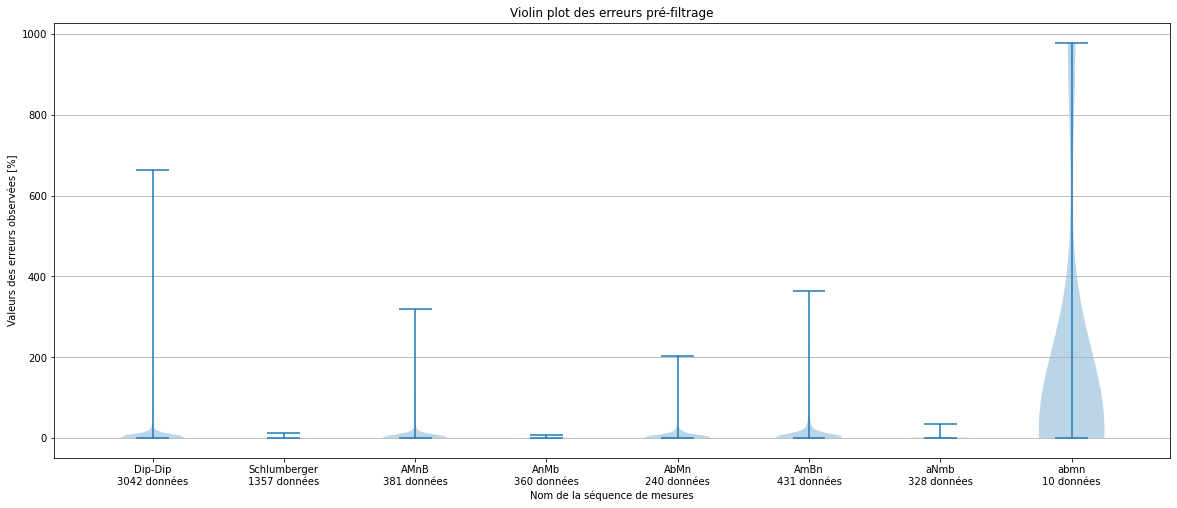

In [32]:
data = [df_data['err'], df_data1['err'], df_data2['err'], df_data3['err'], df_data4['err'], df_data5['err'], df_data6['err'], df_data7['err']]
fig, ax = plt.subplots(figsize=(20,8))
set_axis_style(ax, labels)
ax.set_title('Violin plot des erreurs pré-filtrage')
ax.set_ylabel('Valeurs des erreurs observées [%]') #erreur sur le rapport u/i
# ax.set_ylim(-.5,700.5)
plt.grid(axis='y')
ax.violinplot(data)
# plt.savefig('Filtre/Violin plot des err pré-filtrage.svg')

In [33]:
a=10
df_10=df_data.query(f"err<{a}")
df1_10=df_data1.query(f"err<{a}")
df2_10=df_data2.query(f"err<{a}")
df3_10=df_data3.query(f"err<{a}")
df4_10=df_data4.query(f"err<{a}")
df5_10=df_data5.query(f"err<{a}")
df6_10=df_data6.query(f"err<{a}")
df7_10=df_data7.query(f"err<{a}")

In [34]:
np.median(df_data['err'])

1.0

{'bodies': [<matplotlib.collections.PolyCollection at 0x2d5aeb143d0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x2d5aeb143a0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2d5aeb20ee0>,
 'cbars': <matplotlib.collections.LineCollection at 0x2d5aeb31430>}

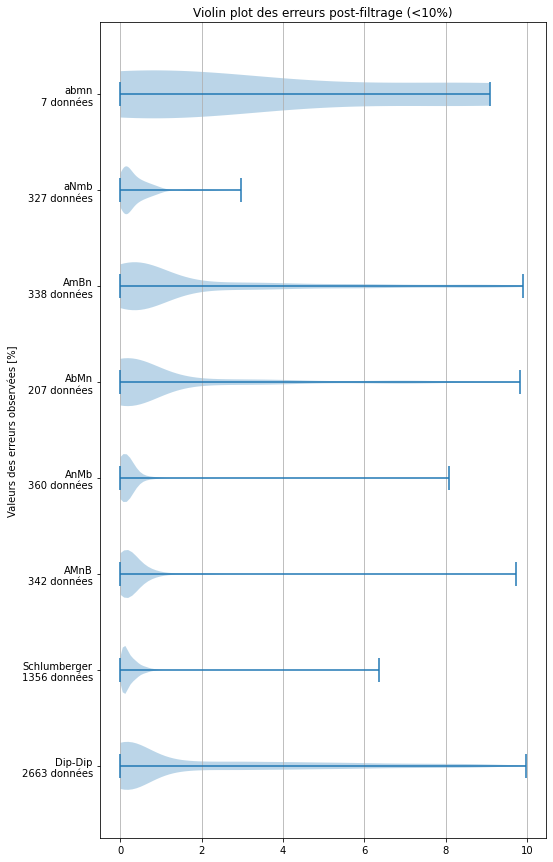

In [35]:
data = [df_10['err'], df1_10['err'], df2_10['err'], df3_10['err'], df4_10['err'], df5_10['err'], df6_10['err'], df7_10['err']]
labels10 = [f'Dip-Dip\n{len(df_10)} données', f'Schlumberger\n{len(df1_10)} données', f'AMnB\n{len(df2_10)} données', f'AnMb\n{len(df3_10)} données',
          f'AbMn\n{len(df4_10)} données', f'AmBn\n{len(df5_10)} données', f'aNmb\n{len(df6_10)} données', f'abmn\n{len(df7_10)} données']
fig, ax = plt.subplots(figsize=(8,15))
set_axis_styley(ax, labels10)
ax.set_title(f'Violin plot des erreurs post-filtrage (<{a}%)')
ax.set_ylabel('Valeurs des erreurs observées [%]')
# ax.set_ylim(-.5,20.5)
plt.grid(axis='x')
ax.violinplot(data,showmedians=False, vert=False)
# plt.savefig(f'Filtre/Violin ploth des err post-filtrage inf{a}%.svg')

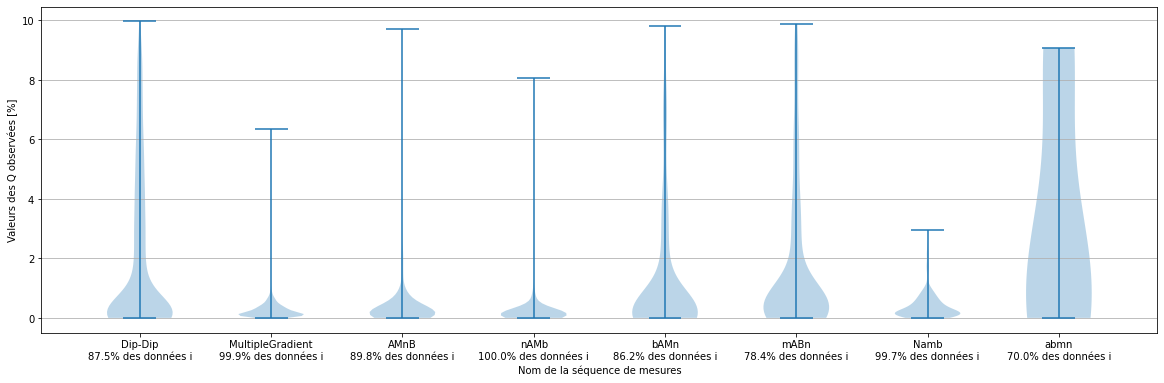

In [68]:
data = [df_10['err'], df1_10['err'], df2_10['err'], df3_10['err'], df4_10['err'], df5_10['err'], df6_10['err'], df7_10['err']]
labels10 = [f'Dip-Dip\n{round(100*len(df_10)/len(df_data),1)}% des données i', f'MultipleGradient\n{round(100*len(df1_10)/len(df_data1),1)}% des données i', f'AMnB\n{round(100*len(df2_10)/len(df_data2),1)}% des données i', f'nAMb\n{round(100*len(df3_10)/len(df_data3),1)}% des données i',
          f'bAMn\n{round(100*len(df4_10)/len(df_data4),1)}% des données i', f'mABn\n{round(100*len(df5_10)/len(df_data5),1)}% des données i', f'Namb\n{round(100*len(df6_10)/len(df_data6),1)}% des données i', f'abmn\n{round(100*len(df7_10)/len(df_data7),1)}% des données i']
fig, ax = plt.subplots(figsize=(20,6))
set_axis_style(ax, labels10)
# ax.set_title(f'Violin plot des erreurs post-filtrage (<{a}%)')
ax.set_ylabel('Valeurs des Q observées [%]')
# ax.set_ylim(-.5,20.5)
plt.grid(axis='y')
ax.violinplot(data,showmedians=False, vert=True)
plt.savefig(f'Filtre/Violin plot des err post-filtrage inf{a}%1.pdf', bbox_inches='tight', pad_inches=0.05)

{'bodies': [<matplotlib.collections.PolyCollection at 0x2d5af0cfe20>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x2d5af0cfdf0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2d5af1578e0>,
 'cbars': <matplotlib.collections.LineCollection at 0x2d5af157df0>}

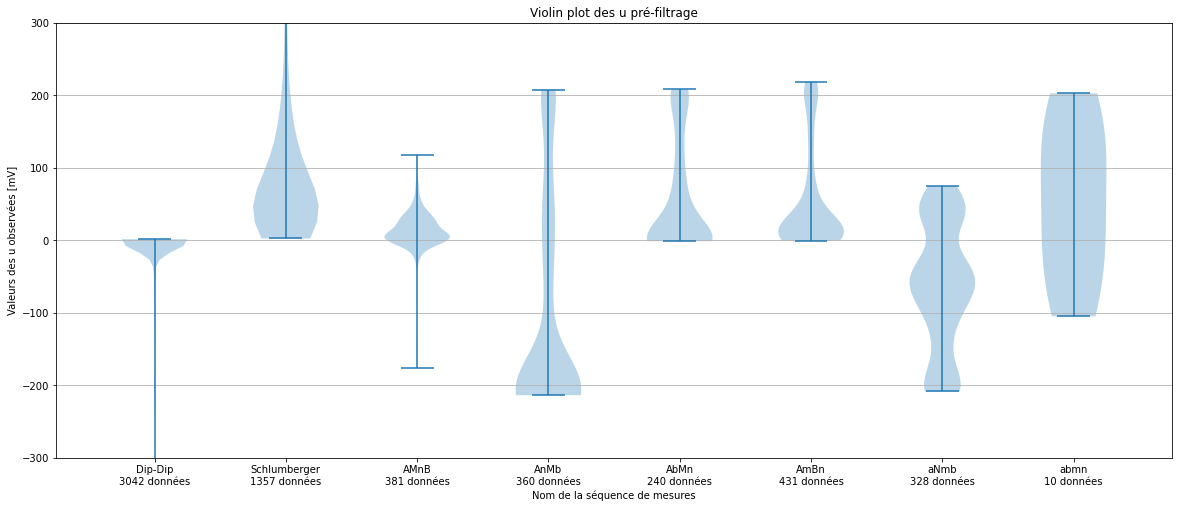

In [37]:
data = [df_data.query("err<10")['u'], df_data1.query("err<10")['u'], df_data2.query("err<10")['u'], df_data3.query("err<10")['u'], df_data4.query("err<10")['u'], df_data5.query("err<10")['u'], df_data6.query("err<10")['u'], df_data7.query("err<10")['u']]
fig, ax = plt.subplots(figsize=(20,8))
set_axis_style(ax, labels)
ax.set_title('Violin plot des u pré-filtrage')
ax.set_ylabel('Valeurs des u observées [mV]')
ax.set_ylim(-300,300)
plt.grid(axis='y')
ax.violinplot(data)
#plt.savefig('Filtre/Violin plot des u post-filtrage(err inf10%) (ax.set_ylim(-300,300)).svg')

(array([[<AxesSubplot:title={'center':'err'}>]], dtype=object),
 array([[<AxesSubplot:title={'center':'err'}>]], dtype=object))

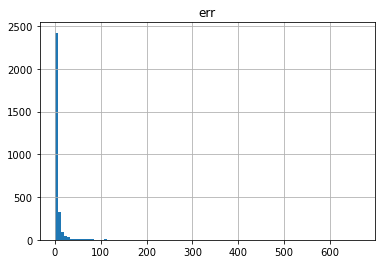

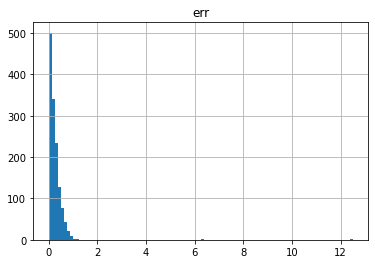

In [228]:
df_data.hist("err",bins=100), df_data1.hist("err",bins=100)

In [256]:
df_10=df_data.query("err<10")
df_10,len(df_data)

(       a   b   m   n        u        i   err
 0      1   2   3   4 -123.911  233.250  0.15
 1      2   3   4   5 -175.910  331.912  0.07
 2      3   4   5   6 -208.156  375.646  0.00
 3      4   5   6   7 -208.865  404.408  0.03
 4      5   6   7   8 -197.379  405.942  0.27
 ...   ..  ..  ..  ..      ...      ...   ...
 3037  76  77  79  80 -122.328  354.643  0.03
 3038  76  77  80  81  -39.196  354.643  0.08
 3039  77  78  79  80 -631.622  374.835  0.06
 3040  77  78  80  81 -123.206  374.835  0.05
 3041  78  79  80  81 -202.450  116.489  0.06
 
 [2663 rows x 7 columns],
 3042)

[]

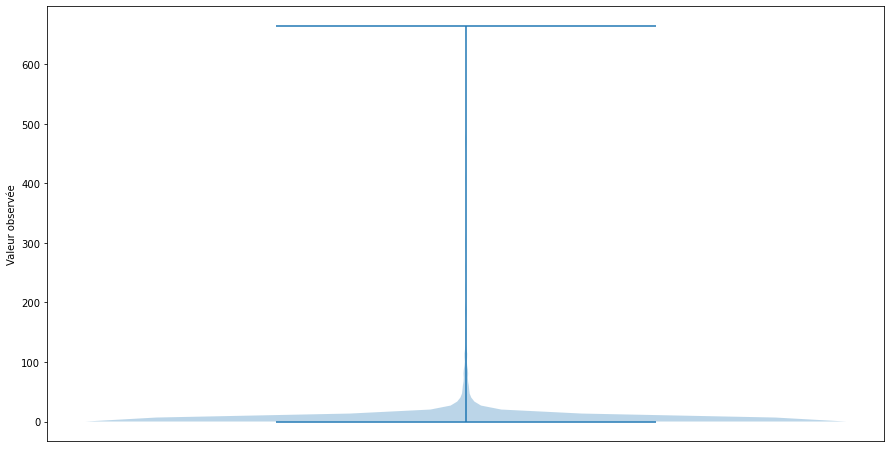

In [245]:
fig, ax = plt.subplots(figsize=(15,8))
ax.violinplot(df_data["err"], showmeans=False, showextrema=True, showmedians=False)
ax.set_ylabel('Valeur observée')
ax.set_xticks([])
ax.set_xticklabels([])

DEF : A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable. (distribution, dispersion)

(array([[<AxesSubplot:title={'center':'u'}>]], dtype=object), 2.288, -936.586)

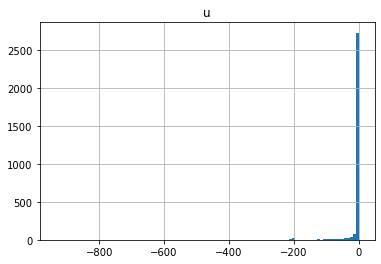

In [11]:
df_data.hist("u",bins=100), max(df_data["u"]), min(df_data["u"])

In [36]:
# df_10=df_data.query("u>10")
# df_10

,a,b,m,n,u,i,err
212,85,86,37,56,211.275,212.576,0.20
213,85,86,36,57,206.757,203.601,0.09
214,85,86,35,58,204.551,208.349,0.06
215,85,86,34,59,199.738,220.127,0.25
216,85,86,33,60,211.310,255.542,0.19
...,...,...,...,...,...,...,...
426,87,88,59,78,32.723,570.150,0.11
427,87,88,59,79,32.023,570.652,0.23
428,87,88,59,80,32.272,571.189,0.99
429,87,88,59,81,31.507,571.558,0.14


[]

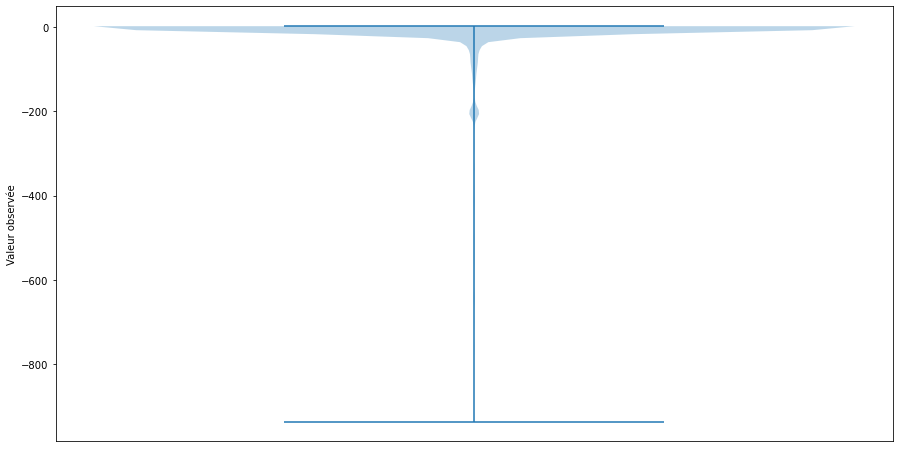

In [87]:
fig, ax = plt.subplots(figsize=(15,8))
ax.violinplot(df_data["u"], showmeans=False, showextrema=True, showmedians=False)
ax.set_ylabel('Valeur observée')
ax.set_xticks([])
ax.set_xticklabels([])

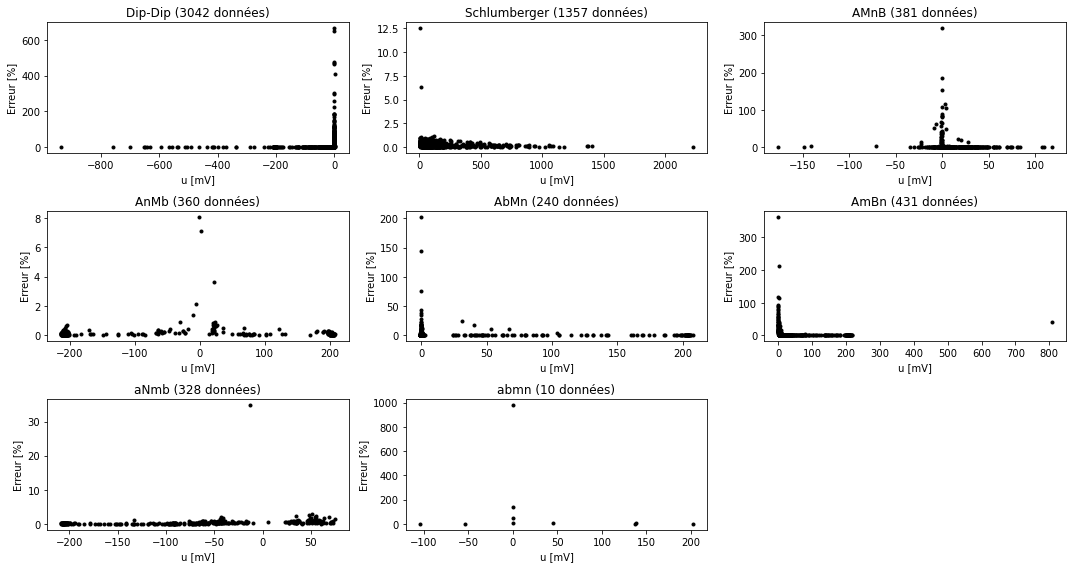

In [128]:
labelsh = [f'Dip-Dip ({len(df_data)} données)', f'Schlumberger ({len(df_data1)} données)', f'AMnB ({len(df_data2)} données)', f'AnMb ({len(df_data3)} données)',
          f'AbMn ({len(df_data4)} données)', f'AmBn ({len(df_data5)} données)', f'aNmb ({len(df_data6)} données)', f'abmn ({len(df_data7)} données)']
fig, ax = plt.subplots(3,3,figsize=(15, 8))
for i in range(3) :
    for j in range(3) :
        ax[i,j].set_xlabel('u [mV]')
        ax[i,j].set_ylabel('Erreur [%]')
        #ax[i,j].set_xlim([-50,50])

ax[0,0].plot(df_data.u, df_data.err, '.k')
ax[0,0].set_title(labelsh[0])
ax[0,1].plot(df_data1.u, df_data1.err, '.k')
ax[0,1].set_title(labelsh[1])
ax[0,2].plot(df_data2.u, df_data2.err, '.k')
ax[0,2].set_title(labelsh[2])
ax[1,0].plot(df_data3.u, df_data3.err, '.k')
ax[1,0].set_title(labelsh[3])
ax[1,1].plot(df_data4.u, df_data4.err, '.k')
ax[1,1].set_title(labelsh[4])
ax[1,2].plot(df_data5.u, df_data5.err, '.k')
ax[1,2].set_title(labelsh[5])
ax[2,0].plot(df_data6.u, df_data6.err, '.k')
ax[2,0].set_title(labelsh[6])
ax[2,1].plot(df_data7.u, df_data7.err, '.k')
ax[2,1].set_title(labelsh[7])
ax[2,2].remove() 
fig.tight_layout()
plt.savefig(f'Filtre/ploterr_u pré-filtrage.svg')

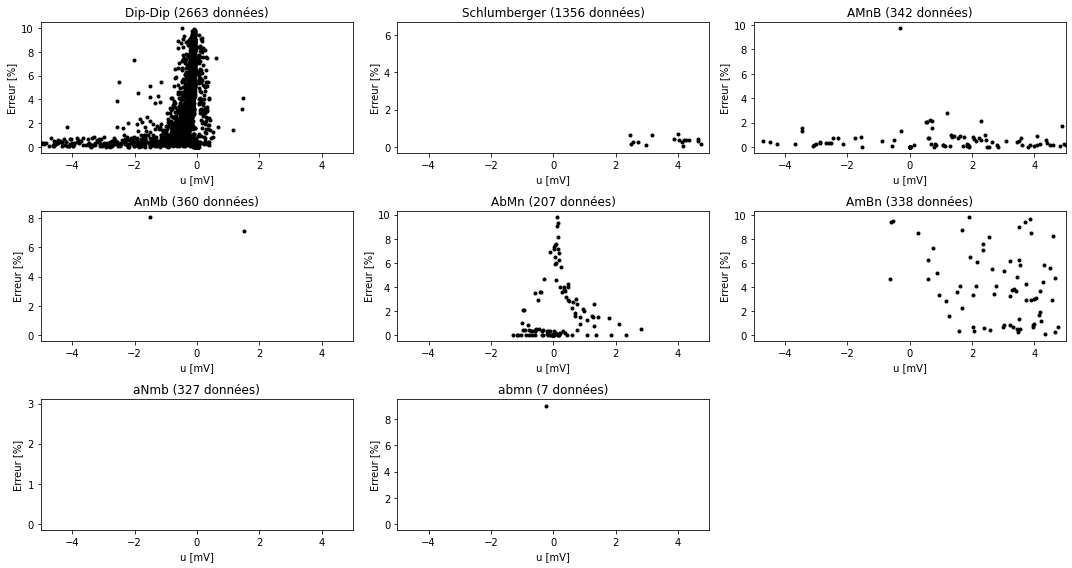

In [129]:
labelsh = [f'Dip-Dip ({len(df_10)} données)', f'Schlumberger ({len(df1_10)} données)', f'AMnB ({len(df2_10)} données)', f'AnMb ({len(df3_10)} données)',
          f'AbMn ({len(df4_10)} données)', f'AmBn ({len(df5_10)} données)', f'aNmb ({len(df6_10)} données)', f'abmn ({len(df7_10)} données)']
fig, ax = plt.subplots(3,3,figsize=(15, 8))
for i in range(3) :
    for j in range(3) :
        ax[i,j].set_xlabel('u [mV]')
        ax[i,j].set_ylabel('Erreur [%]')
        ax[i,j].set_xlim([-5,5])

ax[0,0].plot(df_10.u, df_10.err, '.k')
ax[0,0].set_title(labelsh[0])
ax[0,1].plot(df1_10.u, df1_10.err, '.k')
ax[0,1].set_title(labelsh[1])
ax[0,2].plot(df2_10.u, df2_10.err, '.k')
ax[0,2].set_title(labelsh[2])
ax[1,0].plot(df3_10.u, df3_10.err, '.k')
ax[1,0].set_title(labelsh[3])
ax[1,1].plot(df4_10.u, df4_10.err, '.k')
ax[1,1].set_title(labelsh[4])
ax[1,2].plot(df5_10.u, df5_10.err, '.k')
ax[1,2].set_title(labelsh[5])
ax[2,0].plot(df6_10.u, df6_10.err, '.k')
ax[2,0].set_title(labelsh[6])
ax[2,1].plot(df7_10.u, df7_10.err, '.k')
ax[2,1].set_title(labelsh[7])
ax[2,2].remove() 
fig.tight_layout()
#plt.savefig(f'Filtre/ploterr_u post-filtrage inf{a}%.svg')

Text(0, 0.5, 'ERROR [%]')

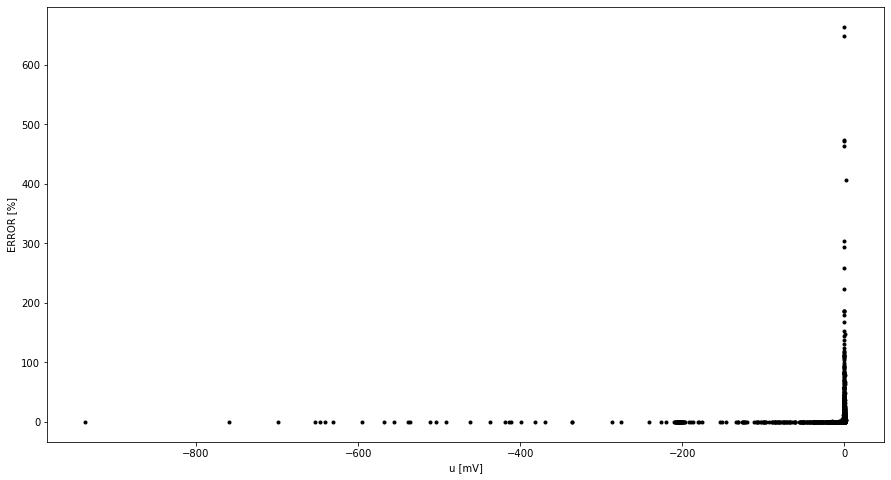

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df_data.u, df_data.err, '.k')
#ax.set_xlim([-5,5])
ax.set_xlabel('u [mV]')
ax.set_ylabel('ERROR [%]')

In [13]:
df_filtered = df_data.query('u<-0.05 or u>0.05')
df_filtered = df_filtered.query('u>-700')
df_filtered = df_filtered[df_filtered['i'] != 0]
df_filtered

,a,b,m,n,u,i,err
0,1,2,3,4,-123.911,233.250,0.15
1,2,3,4,5,-175.910,331.912,0.07
2,3,4,5,6,-208.156,375.646,0.00
3,4,5,6,7,-208.865,404.408,0.03
4,5,6,7,8,-197.379,405.942,0.27
...,...,...,...,...,...,...,...
3037,76,77,79,80,-122.328,354.643,0.03
3038,76,77,80,81,-39.196,354.643,0.08
3039,77,78,79,80,-631.622,374.835,0.06
3040,77,78,80,81,-123.206,374.835,0.05


([<matplotlib.lines.Line2D at 0x1ccdf7a5a60>], 2242, 3042)

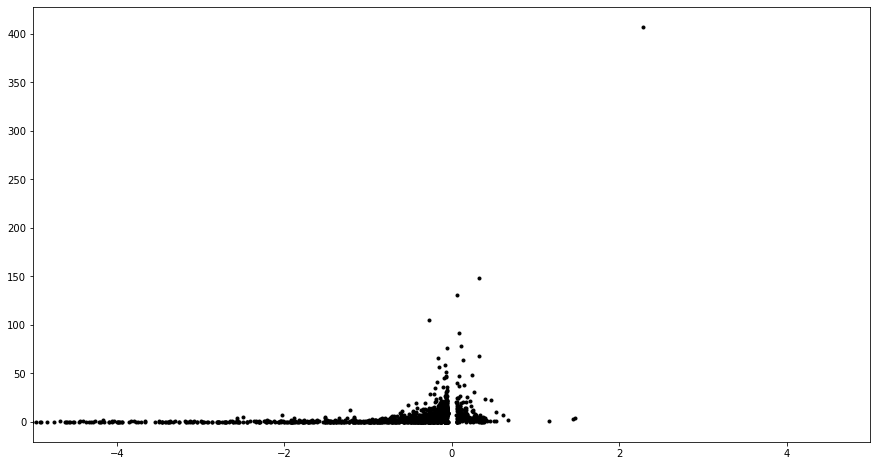

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlim([-5,5])
ax.plot(df_filtered.u, df_filtered.err, '.k'), len(df_filtered), len(df_data)

In [153]:
#df_filtered1 = df1_10.query('u<1300')
df_filtered1 = df_data1.query('err<3')
df_filtered1

,a,b,m,n,u,i,err
0,1,13,2,3,296.693,348.304,0.34
1,1,13,3,4,85.692,348.304,0.47
2,1,13,4,5,41.781,348.304,0.54
3,1,13,5,6,26.646,348.304,0.62
4,1,13,6,7,20.221,348.304,0.56
...,...,...,...,...,...,...,...
1352,22,82,52,57,18.746,457.822,0.53
1353,22,82,57,62,13.036,457.822,0.61
1354,22,82,62,67,17.394,457.822,0.49
1355,22,82,67,72,63.576,457.822,0.36


([<matplotlib.lines.Line2D at 0x230aee6d1c0>], 1355, 1357)

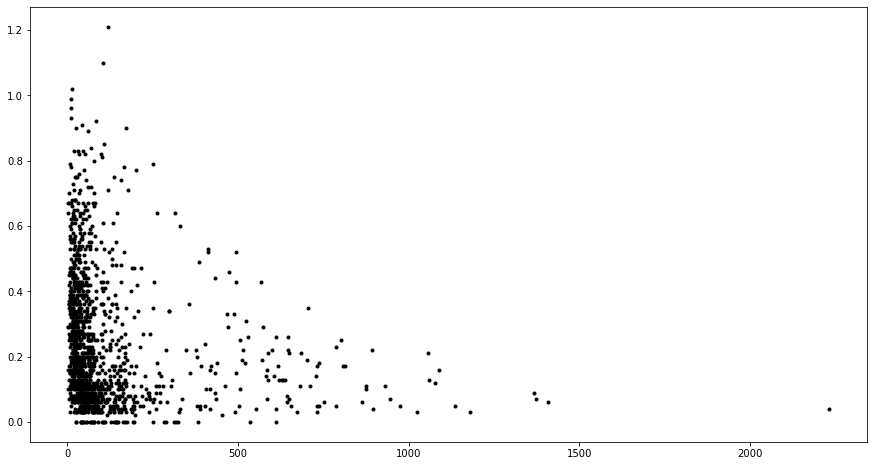

In [154]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df_filtered1.u, df_filtered1.err, '.k'), len(df_filtered1), len(df_data1)

In [17]:
write_ert_data('dipdipgps.txt', df_elec, df_filtered)
# write_ert_data('gradgps.txt', df_elec, df_data1, df_eleck, 'gradgpsk.txt')

In [17]:
write_ert_data(filename2, df_elec2, df_data2)
write_ert_data(filename3, df_elec3, df_data3)
write_ert_data(filename4, df_elec4, df_data4)
write_ert_data(filename5, df_elec5, df_data5)
write_ert_data(filename6, df_elec6, df_data6)
write_ert_data(filename7, df_elec7, df_data7)

In [10]:
write_ert_data('aa4enterrees.txt', df_elec7, df_data7, df_eleck_ent, 'aa4enterreesk.txt')

In [150]:
len(df_data.query('err<1'))/len(df_data) * 100.

49.86850756081525